<h1 id="hierarchical_agglomerative">Hierarchical Clustering - Agglomerative</h1>

Nous examinerons une technique de clustering, qui est le <b>clustering hiérarchique agglomératif</b>. N'oubliez pas que l'approche agglomérative est l'approche ascendante. <br> 
<br>Nous utiliserons également le lien complet comme critère de lien. <br> 

In [1]:
%matplotlib inline

In [2]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 

<hr>
<h3 id="generating_data">Générer des données aléatoires</h3>
Nous allons générer un ensemble de données à l'aide de la classe <b>make_blobs</b>. <br> 
<ul>
    <li> <b>n_samples</b> : le nombre total de points répartis également entre les groupes. </li>
    <li> <b>centers</b> : le nombre de centres à générer ou les emplacements fixes des centres. </li>
    <li> <b>cluster_std</b> : l'écart type des clusters. Plus le nombre est grand, plus les clusters sont éloignés</li>
</ul> <br>

In [13]:
centers=[[4,4], [-2, -1], [1, 1], [10,4]]
len(centers)

4

In [14]:
X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=1.3)

In [21]:
y1

array([3, 2, 2, 2, 3, 1, 0, 0, 1, 0, 2, 1, 3, 1, 0, 0, 3, 0, 0, 3, 0, 1,
       2, 1, 2, 1, 2, 1, 0, 3, 3, 1, 1, 3, 2, 3, 2, 3, 0, 1, 2, 0, 2, 2,
       3, 0, 0, 1, 1, 3])

Le nuage de points des données générées aléatoirement.

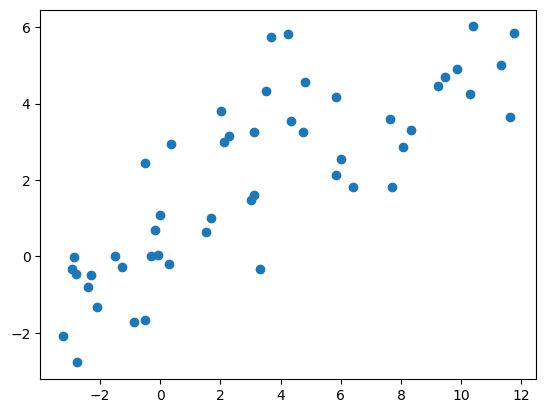

In [15]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 

<hr>
<h3 id="agglomerative_clustering">Agglomerative Clustering</h3>

La classe <b> Agglomerative Clustering </b> nécessitera deux entrées :

<ul>
    <li> <b>n_clusters</b> : le nombre de clusters à former ainsi que le nombre de centroïdes à générer. </li>
    <li> <b>linkage</b> : quel critère de liaison utiliser. Le critère de liaison détermine la distance à utiliser entre les ensembles d'observations. L'algorithme va fusionner les paires de cluster qui minimisent ce critère. </li>
</ul>

In [25]:
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'complete')

In [26]:
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='complete', n_clusters=4)

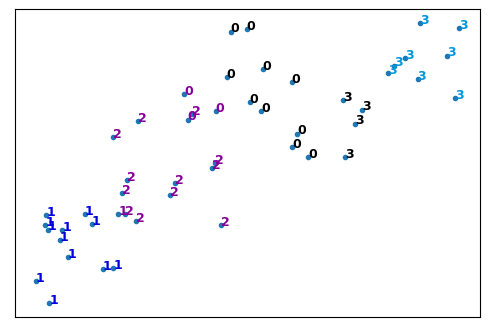

In [27]:
plt.figure(figsize=(6,4))

# Ces deux lignes de code sont utilisées pour réduire les points de données,
# Sinon, les points de données seront dispersés très loin les uns des autres.

# Créez une plage minimale et maximale de X1.
x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)

# Obtenez la distance moyenne pour X1.
X1 = (X1 - x_min) / (x_max - x_min)

# Cette boucle affiche tous les points de données.
for i in range(X1.shape[0]):
    # Remplacez les points de données par leur valeur de cluster respective
    # (ex. 0) est codé par couleur avec une palette de couleurs (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Supprimez les graduations x, les graduations y, les axes x et y
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Affichage du tracé des données d'origine avant le regroupement
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
plt.show()

<h3 id="dendrogram">Dendrogramme associé pour le clustering hiérarchique agglomératif</h3>

<b>Une matrice de distance</b> contient la <b> distance de chaque point à tous les autres points d'un jeu de données </b>.

Utilisation de la fonction <b> distance_matrix, </b> qui nécessite <b>deux entrées</b>. 


In [29]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         0.61695036 0.535778   ... 0.87764099 0.97581329 0.06685835]
 [0.61695036 0.         0.24188054 ... 0.35458439 0.42927656 0.67235209]
 [0.535778   0.24188054 0.         ... 0.34529592 0.44526748 0.60113827]
 ...
 [0.87764099 0.35458439 0.34529592 ... 0.         0.10051579 0.94179931]
 [0.97581329 0.42927656 0.44526748 ... 0.10051579 0.         1.03950995]
 [0.06685835 0.67235209 0.60113827 ... 0.94179931 1.03950995 0.        ]]


A l'aide de la classe <b>linking </b> de la hiérarchie, transmission des paramètres :

<ul>
    <li> La matrice de distance </li>
    <li> 'complete' pour une liaison complète </li>
</ul>

In [30]:
Z = hierarchy.linkage(dist_matrix, 'complete')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_14384\3518085107.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


* Un regroupement hiérarchique est généralement visualisé sous la forme d'un dendrogramme, comme indiqué dans la cellule suivante. Chaque fusion est représentée par une ligne horizontale. La coordonnée y de la ligne horizontale est la similarité des deux clusters qui ont été fusionnés, où les villes sont considérées comme des clusters singleton.
En remontant de la couche inférieure au nœud supérieur, un dendrogramme nous permet de reconstruire l'historique des fusions qui ont abouti au regroupement représenté.

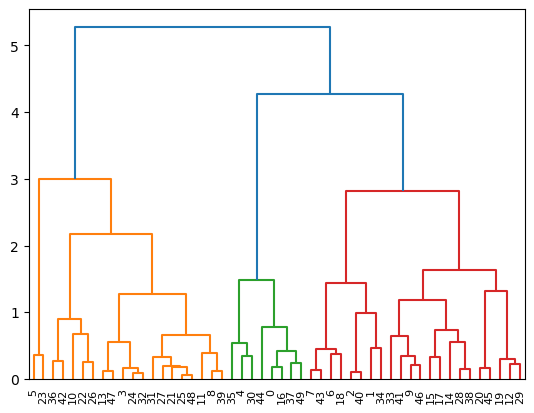

In [31]:
dendro = hierarchy.dendrogram(Z)